# This Notebook does the following:
1. **Performs EDA on csllinkedbypreg full dataset**
1. **Tries to simulate Venkatesh EBLoss target**
1. **Uses util_mwb.convert_integer to create IntegerArray (Int8)**
1. **Saves off both converted data, and a type dict for future reads**
1. **Saves off a high_EBL file for future use**

In [1]:
# Requires at least Python 3.6, I believe
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False
print(sys.version)
print(pd.__version__) # Must be at least 0.24.1 for IntegerArray

3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]
1.2.3


# If "short_cut", already converted file will be read instead of the sas7bdat

In [2]:
# Hard-coded (but relative) path name. Note that ../data isn't populated it Git to save space
%time csl_df = pd.read_sas('../data/csl/csllinkedbypreg.sas7bdat', format = 'sas7bdat', encoding='iso-8859-1')
csl_df.head()

CPU times: user 19.7 s, sys: 7.2 s, total: 26.9 s
Wall time: 29.9 s


,Sitenum,MomID,Marital,Education,Insurance,Momage,Parity,Gravidity,Hxlivebirth,Hxmacrosomia,...,Fulldilattime,Placenttime,Inducttime,Ripentime,ROMtime,Epiduraltime,Intraantibtime,USdays,LMPdays,onepregflag
0,41,41-00001,1.0,3.0,1.0,34.0,4.0,5.0,4.0,1.0,...,15.0,4.0,361.0,NaN,300.0,343.0,346.0,103.0,271.0,2.0
1,41,41-00001,1.0,3.0,1.0,36.0,5.0,6.0,5.0,2.0,...,18.0,3.0,369.0,NaN,251.0,314.0,NaN,128.0,278.0,2.0
2,41,41-00002,1.0,3.0,1.0,37.0,1.0,3.0,1.0,1.0,...,NaN,1.0,NaN,NaN,1.0,4.0,NaN,128.0,268.0,1.0
3,41,41-00003,1.0,3.0,1.0,36.0,1.0,4.0,1.0,1.0,...,69.0,4.0,382.0,NaN,369.0,364.0,NaN,133.0,273.0,1.0
4,41,41-00004,1.0,2.0,1.0,34.0,2.0,6.0,2.0,1.0,...,12.0,5.0,339.0,NaN,105.0,116.0,455.0,204.0,274.0,1.0


## Use mwb_util.convert_integer to use IntegerArray types as appropriate
We don't want floats for categoricals just because of NaNs

### Note: this takes about 7 minutes

In [3]:
from util_mwb import convert_integer
%time all_types = convert_integer(csl_df)
csl_df

CPU times: user 3min 37s, sys: 3min 44s, total: 7min 22s
Wall time: 7min 22s


,Sitenum,MomID,Marital,Education,Insurance,Momage,Parity,Gravidity,Hxlivebirth,Hxmacrosomia,...,Fulldilattime,Placenttime,Inducttime,Ripentime,ROMtime,Epiduraltime,Intraantibtime,USdays,LMPdays,onepregflag
0,41,41-00001,1,3,1,34,4,5,4,1,...,15,4,361,<NA>,300,343,346,103,271,2
1,41,41-00001,1,3,1,36,5,6,5,2,...,18,3,369,<NA>,251,314,<NA>,128,278,2
2,41,41-00002,1,3,1,37,1,3,1,1,...,<NA>,1,<NA>,<NA>,1,4,<NA>,128,268,1
3,41,41-00003,1,3,1,36,1,4,1,1,...,69,4,382,<NA>,369,364,<NA>,133,273,1
4,41,41-00004,1,2,1,34,2,6,2,1,...,12,5,339,<NA>,105,116,455,204,274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228433,52,52-07247,8,1,8,19,0,1,0,9,...,86,5,1236,471,464,403,<NA>,<NA>,260,1
228434,52,52-07248,8,8,8,34,1,3,1,9,...,<NA>,<NA>,168,1580,<NA>,182,<NA>,<NA>,175,1
228435,52,52-07249,8,8,8,28,3,5,2,9,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
228436,52,52-07250,8,8,8,16,0,1,0,9,...,<NA>,5,<NA>,<NA>,<NA>,248,<NA>,<NA>,<NA>,1


In [4]:
out_flag = False
# Write out dictionary of type mappings
filename = '/MFMDatasets/MFM_bopf/data/csl/MFM_linked-by-preg_typedict.npy'
if out_flag:
    np.save(filename, all_types)
else:
    print(f'File not written: {filename}')

File not written: /MFMDatasets/MFM_bopf/data/csl/MFM_linked-by-preg_typedict.npy


In [5]:
csl_df.set_index('MomID', inplace=True)

In [6]:
out_flag = False
# Write out Int8 version of file
int8_file = '/MFMDatasets/MFM_bopf/data/csl/MFM_linked-by-preg_Int8.csv'
if out_flag:
    csl_df.to_csv(int8_file)
else:
    print(f'File not written: {int8_file}')

File not written: /MFMDatasets/MFM_bopf/data/csl/MFM_linked-by-preg_Int8.csv


In [7]:
# This test takes a long time, so commented out
# test_types = np.load(filename, allow_pickle='TRUE').item()
# test_df = pd.read_csv('/MFMDatasets/MFM_bopf/data/csl/MFM_linked-by-preg_Int8.csv', index_col=0, dtype=test_types)
# test_df 

In [8]:
# Test is commented out, so also the memory clean up
#del test_types, test_df
#%reset_selective -f [test_types, test_df] # Free up extra memory since linkedByPreg is big

In [9]:
for col in csl_df:
    if 'trans' in col.lower() or 'blood' in col.lower() or 'age' in col.lower():
        print(col)

Momage
Cerclage
Triagedilat
Numvagex
Bloodproduct
Posttransfus
Docage
Hospdosage1
Hospdosage2
Hospdosage3
Ntransfuse1
Ntransfuse2
Ntransfuse3
Ntransfuse4
postpartum_hemorrhage9
hemorrhage
hemorrhage_new
Triagetime


In [10]:
csl_df['Hostype'].astype(int).value_counts()

2    113499
1     98233
3     16706
Name: Hostype, dtype: int64

In [11]:
pd.crosstab(index=csl_df['Hostype'], columns=csl_df['Sitenum'])

Sitenum,41,42,43,44,45,46,47,48,49,50,51,52
Hostype,,,,,,,,,,,,
1,0,6420,12637,23141,0,7877,0,18258,3759,0,18392,7749
2,33614,0,0,0,20329,0,14667,0,24110,20779,0,0
3,16706,0,0,0,0,0,0,0,0,0,0,0


In [12]:
csl_df['Inoxy_incrdose'].astype(int).value_counts(sort=False)

1      53704
2      62443
777    23141
666    68712
555    20438
Name: Inoxy_incrdose, dtype: int64

In [13]:
trans_df = csl_df[['Bloodproduct','Posttransfus', 'EBLoss', 'Delmode']].copy()
print(len(trans_df.index))
trans_df['EBLoss'].isna().sum()
trans_df.head()  # Note - the util_mwb.convert_integer function changes the DataFrame *in place*

228438


,Bloodproduct,Posttransfus,EBLoss,Delmode
MomID,,,,
41-00001,1,1,NaN,1
41-00001,1,1,NaN,1
41-00002,1,1,NaN,5
41-00003,1,1,250.0,1
41-00004,1,1,250.0,1


In [14]:
print(228438 - 57903)

170535


In [15]:
trans_df['EBLoss'].value_counts(dropna=False, bins=[0,999.9,990000])

(-0.001, 999.9]      162912
(999.9, 990000.0]      7623
Name: EBLoss, dtype: int64

In [16]:
print(162912 + 7623)

170535


In [17]:
trans_df['Bloodproduct'].value_counts(dropna=False).sort_index()

1      168992
2        1709
9       57737
NaN         0
Name: Bloodproduct, dtype: Int64

In [18]:
trans_df['xfus_any'] = 0
trans_df.loc[(trans_df['Bloodproduct'] == 2) | (trans_df['Posttransfus'] == 2), 'xfus_any'] = 1
trans_df

,Bloodproduct,Posttransfus,EBLoss,Delmode,xfus_any
MomID,,,,,
41-00001,1,1,NaN,1,0
41-00001,1,1,NaN,1,0
41-00002,1,1,NaN,5,0
41-00003,1,1,250.0,1,0
41-00004,1,1,250.0,1,0
...,...,...,...,...,...
52-07247,1,1,300.0,2,0
52-07248,1,1,100.0,3,0
52-07249,2,1,2000.0,5,1


In [19]:
trans_df['high_EBL'] = 0
trans_df.loc[(trans_df['EBLoss'] >= 1000), 'high_EBL'] = 1
trans_df

,Bloodproduct,Posttransfus,EBLoss,Delmode,xfus_any,high_EBL
MomID,,,,,,
41-00001,1,1,NaN,1,0,0
41-00001,1,1,NaN,1,0,0
41-00002,1,1,NaN,5,0,0
41-00003,1,1,250.0,1,0,0
41-00004,1,1,250.0,1,0,0
...,...,...,...,...,...,...
52-07247,1,1,300.0,2,0,0
52-07248,1,1,100.0,3,0,0
52-07249,2,1,2000.0,5,1,1


In [20]:
trans_df['high_EBL'] = 0
trans_df.loc[(trans_df['EBLoss'] >= 1000), 'high_EBL'] = 1
trans_df.loc[(trans_df['EBLoss'].isna()), 'high_EBL'] = 9
trans_df

,Bloodproduct,Posttransfus,EBLoss,Delmode,xfus_any,high_EBL
MomID,,,,,,
41-00001,1,1,NaN,1,0,9
41-00001,1,1,NaN,1,0,9
41-00002,1,1,NaN,5,0,9
41-00003,1,1,250.0,1,0,0
41-00004,1,1,250.0,1,0,0
...,...,...,...,...,...,...
52-07247,1,1,300.0,2,0,0
52-07248,1,1,100.0,3,0,0
52-07249,2,1,2000.0,5,1,1


## Save off high_EBLoss to file

In [21]:
high_EBL_df = pd.DataFrame(trans_df['high_EBL'])

In [22]:
out_flag = False
filename = '/MFMDatasets/MFM_bopf/data/csl/high_EBL.txt'
if out_flag:
    high_EBL_df.to_csv(filename, header=True)
else:
    print(f'File not written: {filename}')

File not written: /MFMDatasets/MFM_bopf/data/csl/high_EBL.txt


In [23]:
trans_df['high_EBL'].value_counts(dropna=False).sort_index()

0    162912
1      7623
9     57903
Name: high_EBL, dtype: int64

In [24]:
trans_df['Posttransfus'].value_counts(dropna=False).sort_index()

1      136745
2        5392
9       86300
NaN         1
Name: Posttransfus, dtype: Int64

In [25]:
trans_df[trans_df['high_EBL'] == 0]['Posttransfus'].value_counts(dropna=False).sort_index()

1      85476
2       2200
9      75236
NaN        0
Name: Posttransfus, dtype: Int64

In [26]:
trans_df[trans_df['high_EBL'] == 1]['Posttransfus'].value_counts(dropna=False).sort_index()

1      3723
2       457
9      3443
NaN       0
Name: Posttransfus, dtype: Int64

In [27]:
trans_df[trans_df['high_EBL'] == 9]['Posttransfus'].value_counts(dropna=False).sort_index()

1      47546
2       2735
9       7621
NaN        1
Name: Posttransfus, dtype: Int64

In [28]:
trans_df[trans_df['high_EBL'] == 0]['xfus_any'].value_counts(dropna=False).sort_index()

0    160188
1      2724
Name: xfus_any, dtype: int64

In [29]:
trans_df[trans_df['high_EBL'] == 1]['xfus_any'].value_counts(dropna=False).sort_index()

0    6834
1     789
Name: xfus_any, dtype: int64

In [30]:
trans_df[trans_df['high_EBL'] == 9]['xfus_any'].value_counts(dropna=False).sort_index()

0    55125
1     2778
Name: xfus_any, dtype: int64

In [31]:
trans_df[trans_df['EBLoss'].isna()]['Posttransfus'].value_counts(dropna=False).sort_index()

1      47546
2       2735
9       7621
NaN        1
Name: Posttransfus, dtype: Int64

In [32]:
trans_df[trans_df['Posttransfus'] == 2]['high_EBL'].value_counts(dropna=False).sort_index()

0    2200
1     457
9    2735
Name: high_EBL, dtype: int64

In [33]:
trans_df[trans_df['Posttransfus'] == 1]['high_EBL'].value_counts(dropna=False).sort_index()

0    85476
1     3723
9    47546
Name: high_EBL, dtype: int64

In [34]:
trans_df[trans_df['Posttransfus'] == 9]['high_EBL'].value_counts(dropna=False).sort_index()

0    75236
1     3443
9     7621
Name: high_EBL, dtype: int64

In [35]:
trans_df[trans_df['Posttransfus'] == 9]['EBLoss'].isna().sum()

7621

In [36]:
trans_df[trans_df['Posttransfus'] == 9]['EBLoss'].value_counts(bins=[0,999,990000])

(-0.001, 999.0]      75236
(999.0, 990000.0]     3443
Name: EBLoss, dtype: int64

In [37]:
vhem = trans_df[trans_df['EBLoss'] >= 1000]
len(vhem.index)

7623

In [38]:
vhem['Posttransfus'].value_counts(sort=False).sort_index()

1    3723
2     457
9    3443
Name: Posttransfus, dtype: Int64

In [39]:
vhem_not = trans_df[trans_df['EBLoss'] < 1000]
len(vhem_not.index)

162912

In [40]:
vhem_not['Posttransfus'].value_counts().sort_index()

1    85476
2     2200
9    75236
Name: Posttransfus, dtype: Int64

In [41]:
trans_df['EBLoss'].value_counts(dropna=False, bins=[0,999,900000])

(-0.001, 999.0]      162912
(999.0, 900000.0]      7622
Name: EBLoss, dtype: int64

In [42]:
trans_df['Posttransfus'].value_counts(dropna=False).sort_index()

1      136745
2        5392
9       86300
NaN         1
Name: Posttransfus, dtype: Int64

In [43]:
trans_df['EBLoss'].describe()

count    170535.000000
mean        462.707264
std        2200.072211
min           0.000000
25%         300.000000
50%         350.000000
75%         600.000000
max      900150.000000
Name: EBLoss, dtype: float64

In [44]:
trans_df[trans_df['EBLoss'].isna()]['Posttransfus'].value_counts().sort_index()

1    47546
2     2735
9     7621
Name: Posttransfus, dtype: Int64

In [45]:
trans_df[trans_df['Posttransfus'] == 2.0]['EBLoss'].isna().sum()

2735

In [46]:
pty_EB350 = trans_df[(trans_df['Posttransfus'] == 2.0) & (trans_df['EBLoss'] == 350.0)]
pty_EB350.shape

(245, 6)

In [47]:
pd.options.display.max_rows = 10
ty = trans_df[(trans_df['Posttransfus'] == 2.0) | (trans_df['Bloodproduct'] == 2.0)]
ty

,Bloodproduct,Posttransfus,EBLoss,Delmode,xfus_any,high_EBL
MomID,,,,,,
41-00005,1,2,NaN,1,1,9
41-00018,1,2,150.0,1,1,0
41-00036,1,2,300.0,1,1,0
41-00040,1,2,NaN,1,1,9
41-00046,1,2,200.0,1,1,0
...,...,...,...,...,...,...
52-07229,2,1,1500.0,4,1,1
52-07232,2,1,400.0,1,1,0
52-07243,1,2,NaN,1,1,9


In [48]:
ty['EBLoss'].isna().sum()

2778

In [49]:
for col in ty:
    if col != 'EBLoss':
        print(col)
        print(ty[col].value_counts().to_string())

Bloodproduct
1    4556
2    1709
9      26
Posttransfus
2    5392
9     848
1      51
Delmode
1    3497
4    1283
5     913
2     452
3     146
xfus_any
1    6291
high_EBL
9    2778
0    2724
1     789


In [50]:
ty['EBLoss'].value_counts(dropna=False, bins=[0,999.9,900000])

(-0.001, 999.9]      2724
(999.9, 900000.0]     789
Name: EBLoss, dtype: int64

In [51]:
ty['high_EBL'].value_counts(dropna=False)

9    2778
0    2724
1     789
Name: high_EBL, dtype: int64

In [52]:
print(trans_df.shape[0])
val_df = trans_df[trans_df['EBLoss'] < 900000]
print(val_df.shape[0])

228438
170534


In [53]:
val_df['EBLoss'].value_counts(dropna=False, bins=[0,1000,900000])

(-0.001, 1000.0]      167832
(1000.0, 900000.0]      2702
Name: EBLoss, dtype: int64

In [54]:
val_df['EBLoss'].value_counts(dropna=False, bins=[0,999,900000])

(-0.001, 999.0]      162912
(999.0, 900000.0]      7622
Name: EBLoss, dtype: int64

In [55]:
trans_df.groupby('Bloodproduct')['EBLoss'].value_counts(bins=[0,999,900000])

Bloodproduct  EBLoss           
1             (-0.001, 999.0]      121121
              (999.0, 900000.0]      6096
2             (-0.001, 999.0]         938
              (999.0, 900000.0]       655
9             (-0.001, 999.0]       40853
              (999.0, 900000.0]       871
Name: EBLoss, dtype: int64

In [56]:
val_df.groupby('Bloodproduct')['EBLoss'].value_counts(bins=[0,999,900000])

Bloodproduct  EBLoss           
1             (-0.001, 999.0]      121121
              (999.0, 900000.0]      6096
2             (-0.001, 999.0]         938
              (999.0, 900000.0]       655
9             (-0.001, 999.0]       40853
              (999.0, 900000.0]       871
Name: EBLoss, dtype: int64

In [57]:
trans_df.groupby('Posttransfus')['EBLoss'].value_counts(bins=[0,999,900000])

Posttransfus  EBLoss           
1             (-0.001, 999.0]      85476
              (999.0, 900000.0]     3722
2             (-0.001, 999.0]       2200
              (999.0, 900000.0]      457
9             (-0.001, 999.0]      75236
              (999.0, 900000.0]     3443
Name: EBLoss, dtype: int64

In [58]:
val_df['Posttransfus'].value_counts()

1    89198
9    78679
2     2657
Name: Posttransfus, dtype: Int64

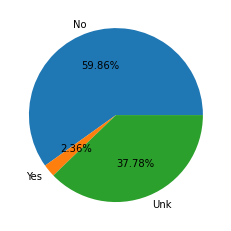

In [59]:
labels = ['No','Yes', 'Unk']
counts = trans_df['Posttransfus'].value_counts().sort_index().values
plt.pie(counts,labels=labels,autopct='%1.2f%%')
plt.show()